# Cardano Epoch Analysis Project

In [ ]:
# Import libraries
import requests 
import json
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time

In [ ]:
# Get all the epoch for the 2021 year
dates = ['2020/12/31', '2021/01/05', '2021/01/10', '2021/01/15', '2021/01/20', '2021/01/25', '2021/01/30', '2021/02/04', '2021/02/09', '2021/02/14',
         '2021/02/19', '2021/02/24', '2021/03/01', '2021/03/06', '2021/03/11', '2021/03/16', '2021/03/21', '2021/03/26', '2021/03/31', '2021/04/05', 
         '2021/04/10', '2021/04/15', '2021/04/20', '2021/04/25', '2021/04/30', '2021/05/05', '2021/05/10', '2021/05/15', '2021/05/20', '2021/05/25', 
         '2021/05/30', '2021/06/04', '2021/06/09', '2021/06/14', '2021/06/19', '2021/06/24', '2021/06/29', '2021/07/04', '2021/07/09', '2021/07/17', 
         '2021/07/19', '2021/07/24', '2021/07/29', '2021/08/03', '2021/08/08', '2021/08/13', '2021/08/18', '2021/08/23', '2021/08/28', '2021/09/02', 
         '2021/09/07', '2021/09/12', '2021/09/17', '2021/09/22', '2021/09/27', '2021/10/02', '2021/10/07', '2021/10/12', '2021/10/17', '2021/10/22', 
         '2021/10/27', '2021/11/01', '2021/11/06', '2021/11/11', '2021/11/16', '2021/11/21', '2021/11/26', '2021/12/01', '2021/12/06', '2021/12/11', 
         '2021/12/16', '2021/12/21', '2021/12/26', '2021/12/31']

profits = []
all_profits = []
suma = []

def get_data(dates):
    for date in dates: 
      global suma  
      url = 'https://api.bittrex.com/v3/markets/ADA-USDT/candles/TRADE/MINUTE_1/historical/'+ date
      temp_data = requests.get(url).json()
      print("Url: ", url)
      print("Requests.get(url): ", requests.get(url)) 
      time.sleep(15)
      
      df = pd.DataFrame(temp_data)
      df.columns = ['StartsAt','Open','High','Low','Close', 'Volume', 'QuoteVolume']
      df.drop(['Volume', 'QuoteVolume'], axis=1, inplace=True)
      
      #Select rows - Before epoch 180 rows
      df_before_epoch = df.iloc[1125:1305].reset_index()

      #Dataframe after epoch - First part - 133 rows
      df_after_epoch_fp = df.iloc[1306:1439]

      #Url for the next day     
      date_time = pd.to_datetime(date) 
      date_time_next_day = timedelta(1)+date_time
      next_day_date = pd.to_datetime(pd.Series(date_time_next_day)) 
      next_day_date_string = next_day_date.dt.strftime('%Y/%m/%d') 
  
      url_next_day = 'https://api.bittrex.com/v3/markets/ADA-USDT/candles/TRADE/MINUTE_1/historical/'+ next_day_date_string[0]
      temp_data2 = requests.get(url_next_day).json()
      print("Requests.get(url_next_day): ", requests.get(url)) 
      time.sleep(15)

      #Dataframe after after epoch - Second part - 47 rows
      df_after_epoch_sp = pd.DataFrame(temp_data2)
      df_after_epoch_sp = df_after_epoch_sp.iloc[0:47]
      df_after_epoch_sp.columns = ['StartsAt','Open','High','Low','Close','Volume', 'QuoteVolume']
      df_after_epoch_sp.drop(['Volume', 'QuoteVolume'], axis=1, inplace=True)

      #Concatenate tables
      df_after_epoch = pd.concat([df_after_epoch_fp, df_after_epoch_sp]).reset_index()

      #Change columns to float type
      prices_before_epoch = df_before_epoch['Close'].astype(float)
      prices_after_epoch = df_after_epoch['Close'].astype(float)
      
      #Calculate profit
      profits = []
      for price_before in prices_before_epoch:
          for price_after in prices_after_epoch:
            profit = ((price_after - price_before) / price_before) * 100;
            profits.append(profit)  

      all_profits.append(profits)
      suma = np.sum(all_profits, axis=0)
      print(suma)

    return 

get_data(dates)
print('All_profits: ', all_profits)
print('Suma: ', suma)

Url:  https://api.bittrex.com/v3/markets/ADA-USDT/candles/TRADE/MINUTE_1/historical/2020/12/31
Requests.get(url):  <Response [200]>
Requests.get(url_next_day):  <Response [200]>
[ 0.16757366  0.16757366  0.16757366 ... -1.02582592 -1.02582592
 -1.02582592]
Url:  https://api.bittrex.com/v3/markets/ADA-USDT/candles/TRADE/MINUTE_1/historical/2021/01/05
Requests.get(url):  <Response [200]>
Requests.get(url_next_day):  <Response [200]>
[1.99690535 1.99296272 1.99296272 ... 1.56079587 1.58585119 2.29912775]
Url:  https://api.bittrex.com/v3/markets/ADA-USDT/candles/TRADE/MINUTE_1/historical/2021/01/10
Requests.get(url):  <Response [200]>
Requests.get(url_next_day):  <Response [200]>
[ 4.08589174  4.34228345  3.52096578 ... -1.87174993 -1.73856236
 -0.98749111]
Url:  https://api.bittrex.com/v3/markets/ADA-USDT/candles/TRADE/MINUTE_1/historical/2021/01/15
Requests.get(url):  <Response [200]>
Requests.get(url_next_day):  <Response [200]>
[ 5.97627985  5.90615332  4.77781263 ... -0.24669617 -0.11

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#Create dataframe
df_suma = pd.DataFrame({'Suma':suma}).reset_index()
df_suma

,index,Suma
0,0,17.215403
1,1,20.172021
2,2,18.834746
3,3,19.024297
4,4,20.800476
...,...,...
32395,32395,25.681537
32396,32396,26.265707
32397,32397,23.476142
32398,32398,24.501265


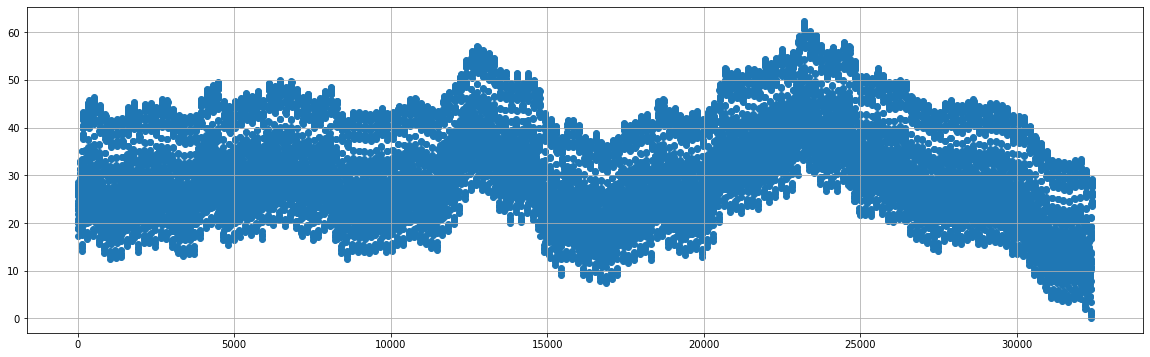

In [ ]:
# Graph the position vs the best profit of the day
plt.figure(figsize=(20,6))
plt.scatter(data= df_suma, x='index', y='Suma')
plt.grid()
plt.show()

In [ ]:
# Highest profit
highest_profit = (max(suma))
print('Highest profit: ', highest_profit)

In [ ]:
#Calculate the position before epoch - Vector of 180 positions
best_profit_position = 23210
position_before_epoch = math.floor(best_profit_position / 180)

#Calculate the position after epoch - Vector of 180 positions
position_after_epoch = best_profit_position - (position_before_epoch * 180)

print("position_before_epoch: ",position_before_epoch)
print("position_after_epoch: ",position_after_epoch)


position_before_epoch:  128
position_after_epoch:  170


In [ ]:
suma

array([17.21540344, 20.1720211 , 18.83474561, ..., 23.47614156,
       24.50126538, 24.04348312])

In [ ]:
from scipy import stats as st
moda=st.mode(suma)
print(moda)

ModeResult(mode=array([0.08316331]), count=array([1]))


In [ ]:
# Create a dataframe with all profits
df1 = pd.DataFrame(all_profits)
df1

,0,1,2,3,4,5,6,7,8,9,...,32390,32391,32392,32393,32394,32395,32396,32397,32398,32399
0,0.167574,0.167574,0.167574,0.167574,0.167574,0.167574,0.167574,0.167574,0.000000,0.000000,...,-1.025826,-1.025826,-1.025826,-1.025826,-1.025826,-1.025826,-1.025826,-1.025826,-1.025826,-1.025826
1,1.829332,1.825389,1.825389,0.856090,1.333221,1.333332,1.333225,1.780778,1.881741,1.881753,...,0.543100,1.226324,1.842490,2.353991,2.642745,3.018048,3.134778,2.586622,2.611677,3.324954
2,2.088986,2.349321,1.528003,1.528003,2.387732,2.387732,2.183362,2.183362,2.183362,2.183362,...,-2.974516,-2.896036,-2.958809,-2.958809,-3.204468,-3.204468,-3.401724,-3.432546,-3.324414,-3.286619


In [ ]:
# Scatter graph index vs price profits
df_all_profits = pd.DataFrame({'price_profits':profits})
df_all_profits = df_all_profits.reset_index()
plt.scatter(data= df_all_profits, x='index', y='price_profits')
plt.legend()
plt.title('Index vs price_profit')
plt.xlabel('Index')
plt.ylabel('price_profit')
plt.show()

In [ ]:
# Join columns in a dataframe
df_profits = pd.DataFrame({'Best_position_before_epoch':best_position_before_epoch,
                          'Best_position_after_epoch':best_position_after_epoch,
                          'Best_profit': best_profit})

,Best_position_before_epoch,Best_position_after_epoch,Best_profit
0,8,117,1.218678
1,40,179,10.517133
2,103,55,10.678021
3,113,160,5.320779
4,2,136,7.594202


Text(0, 0.5, 'Best_profit')

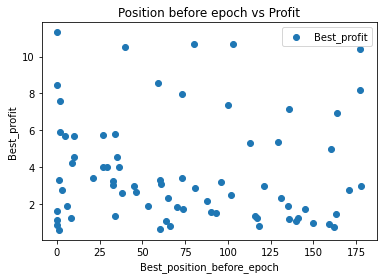

In [ ]:
plt.scatter(data= df_profits, x='Best_position_before_epoch', y='Best_profit')
plt.legend()
plt.title('Position before epoch vs Profit')
plt.xlabel('Best_position_before_epoch')
plt.ylabel('Best_profit')
plt.show()

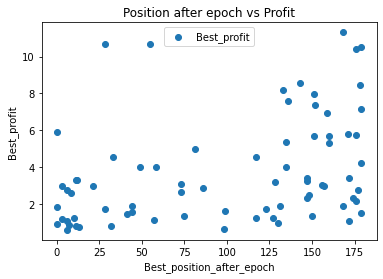

In [ ]:
plt.scatter(data= df_profits, x='Best_position_after_epoch', y='Best_profit')
plt.legend()
plt.title('Position after epoch vs Profit')
plt.xlabel('Best_position_after_epoch')
plt.ylabel('Best_profit')
plt.show()

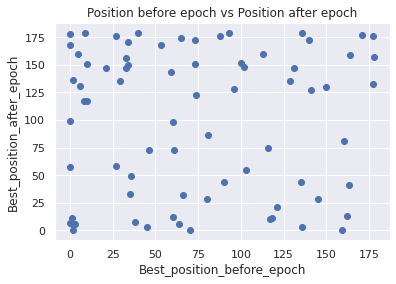

In [ ]:
plt.scatter(data= df_profits, x='Best_position_before_epoch', y='Best_position_after_epoch')
plt.title('Position before epoch vs Position after epoch')
plt.xlabel('Best_position_before_epoch')
plt.ylabel('Best_position_after_epoch')
plt.show()

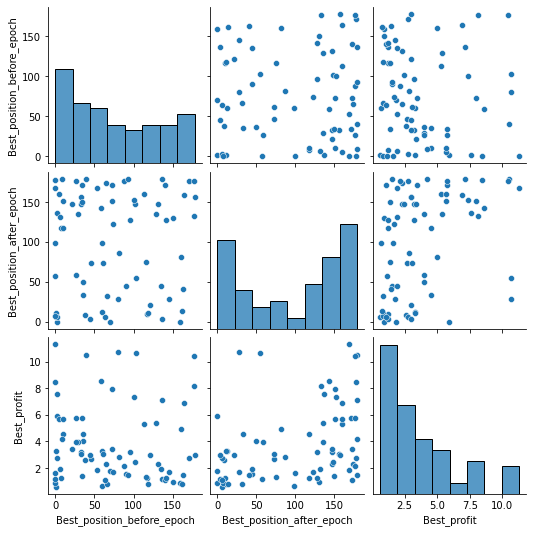

In [ ]:
sns.pairplot(df_profits)
plt.show()

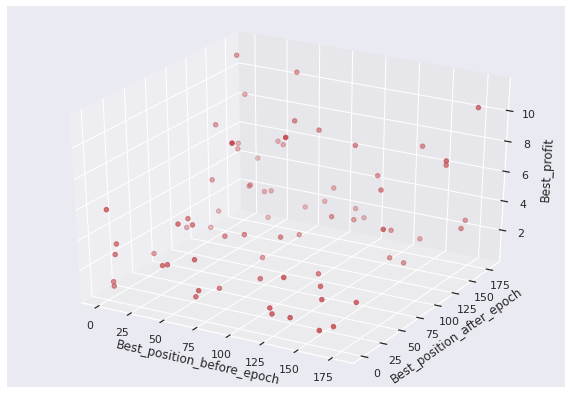

In [ ]:
# 3D graph
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(10, 7)) 
ax = fig.add_subplot(111, projection = '3d')

x = df_profits['Best_position_before_epoch']
y = df_profits['Best_position_after_epoch']
z = df_profits['Best_profit']

ax.set_xlabel("Best_position_before_epoch")
ax.set_ylabel("Best_position_after_epoch")
ax.set_zlabel("Best_profit")

ax.scatter(x, y ,z, c='r', marker='o')
plt.show()